In [1]:
import pandas as pd
import numpy as np
import astroalign as aa
import glob
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import math

In [2]:
#Getting all the csv files for each star image:
file = []
file_list = glob.glob('Reduced_RV_Uma_Light_Blue*stuff*.csv')
file_list

['Reduced_RV_Uma_Light_Blue_32_secs_001.fitsstar_stats_stuff.csv',
 'Reduced_RV_Uma_Light_Blue_32_secs_002.fitsstar_stats_stuff.csv',
 'Reduced_RV_Uma_Light_Blue_32_secs_003.fitsstar_stats_stuff.csv',
 'Reduced_RV_Uma_Light_Blue_32_secs_004.fitsstar_stats_stuff.csv',
 'Reduced_RV_Uma_Light_Blue_32_secs_005.fitsstar_stats_stuff.csv',
 'Reduced_RV_Uma_Light_Blue_32_secs_006.fitsstar_stats_stuff.csv',
 'Reduced_RV_Uma_Light_Blue_32_secs_007.fitsstar_stats_stuff.csv',
 'Reduced_RV_Uma_Light_Blue_32_secs_008.fitsstar_stats_stuff.csv',
 'Reduced_RV_Uma_Light_Blue_32_secs_009.fitsstar_stats_stuff.csv',
 'Reduced_RV_Uma_Light_Blue_32_secs_010.fitsstar_stats_stuff.csv',
 'Reduced_RV_Uma_Light_Blue_32_secs_011.fitsstar_stats_stuff.csv',
 'Reduced_RV_Uma_Light_Blue_32_secs_012.fitsstar_stats_stuff.csv',
 'Reduced_RV_Uma_Light_Blue_32_secs_013.fitsstar_stats_stuff.csv',
 'Reduced_RV_Uma_Light_Blue_32_secs_014.fitsstar_stats_stuff.csv',
 'Reduced_RV_Uma_Light_Blue_32_secs_015.fitsstar_stats_stuff.c

In [3]:
#We will combine all our files onto one large dataframe:
df_append = pd.DataFrame()
for file in file_list:
    df_temp = pd.read_csv(file)
    df_append = df_append.append(df_temp, ignore_index=True)
df_append
    

,Unnamed: 0,Area of circular aperture,Sum of circular aperture,Median of annulus,id,star counts,MJD,xcentroid,ycentroid
0,0,1385.44236,26482.967025,1.093223,1,24968.369771,59658.897835,173.099168,531.931325
1,1,1385.44236,26129.543684,1.071579,2,24644.933434,59658.897835,1069.172170,1336.526466
2,2,1385.44236,9200.822628,1.010599,3,7800.696436,59658.897835,1881.153972,195.887028
3,3,1385.44236,6849.757017,1.026712,4,5427.306968,59658.897835,142.819301,1678.917231
4,4,1385.44236,7239.433903,1.003930,5,5848.546131,59658.897835,2302.355657,612.935815
...,...,...,...,...,...,...,...,...,...
1882,23,1385.44236,3930.287030,2.488001,24,483.304572,59659.005964,1698.872226,1664.483232
1883,24,1385.44236,3871.697483,2.491759,25,419.509258,59659.005964,1527.078996,1494.451253
1884,25,1385.44236,4449.198331,2.514700,26,965.226186,59659.005964,2133.451499,198.304264
1885,26,1385.44236,3933.965858,2.499756,27,470.698530,59659.005964,1916.837497,1545.609315


In [12]:
#We will now select out of df_append the star counts for the variable star and write to a new dataframe:
df_variable = df_append[df_append['xcentroid'].between(1000, 1250, inclusive=False) & df_append['ycentroid'].between(750, 1050, inclusive=False)]
df_variable

C:\Users\micha\AppData\Local\Temp\ipykernel_17448\3430125150.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df_variable = df_append[df_append['xcentroid'].between(1000, 1250, inclusive=False) & df_append['ycentroid'].between(750, 1050, inclusive=False)]


,Unnamed: 0,Area of circular aperture,Sum of circular aperture,Median of annulus,id,star counts,MJD,xcentroid,ycentroid
5,5,1385.44236,3848.102128,1.003062,6,2458.417860,59658.897835,1147.707062,899.782332
49,6,1385.44236,3887.480148,1.049919,7,2432.877713,59658.899479,1148.072095,899.191499
91,6,1385.44236,4002.902621,1.099078,7,2480.193817,59658.901135,1148.587979,898.226056
134,6,1385.44236,4071.081208,1.126902,7,2509.823711,59658.902752,1148.060690,897.736467
174,6,1385.44236,4168.775963,1.175653,7,2539.976523,59658.904386,1152.612121,907.888607
213,5,1385.44236,4252.530303,1.217906,6,2565.191825,59658.905958,1152.413435,907.230072
251,5,1385.44236,4355.199522,1.259681,6,2609.984288,59658.907544,1153.511606,917.056369
285,5,1385.44236,4425.136613,1.303911,6,2618.643121,59658.909088,1154.039859,918.992243
319,5,1385.44236,4767.929054,1.427469,6,2790.252683,59658.913855,1159.175302,882.977803
352,4,1385.44236,4884.685983,1.468246,5,2850.515803,59658.915498,1158.996855,882.379979


In [13]:
#We will now select out of df_append the star counts for the standard star and write to a new dataframe:
df_standard = df_append[df_append['xcentroid'].between(800, 1050, inclusive=False) & df_append['ycentroid'].between(600, 850, inclusive=False)]
df_standard

C:\Users\micha\AppData\Local\Temp\ipykernel_17448\2920512549.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df_standard = df_append[df_append['xcentroid'].between(800, 1050, inclusive=False) & df_append['ycentroid'].between(600, 850, inclusive=False)]


,Unnamed: 0,Area of circular aperture,Sum of circular aperture,Median of annulus,id,star counts,MJD,xcentroid,ycentroid
14,14,1385.44236,1981.182988,0.998485,15,597.839533,59658.897835,923.017943,714.032302
57,14,1385.44236,2040.257810,1.041828,15,596.864621,59658.899479,923.351470,713.303299
101,16,1385.44236,2097.496288,1.084195,17,595.406749,59658.901135,923.812429,712.418003
146,18,1385.44236,2166.501404,1.128237,19,603.394059,59658.902752,923.362313,711.978797
184,16,1385.44236,2217.511803,1.171649,17,594.259593,59658.904386,927.972434,722.126610
222,14,1385.44236,2282.584478,1.205004,15,613.120428,59658.905958,927.605299,721.215018
260,14,1385.44236,2325.135443,1.257161,15,583.411971,59658.907544,928.840190,731.283310
297,17,1385.44236,2390.183890,1.297836,18,592.106663,59658.909088,929.194873,733.043723
325,11,1385.44236,2569.491602,1.425236,12,594.909292,59658.913855,934.310759,696.997011
359,11,1385.44236,2641.946490,1.457576,12,622.559567,59658.915498,934.110187,696.421433


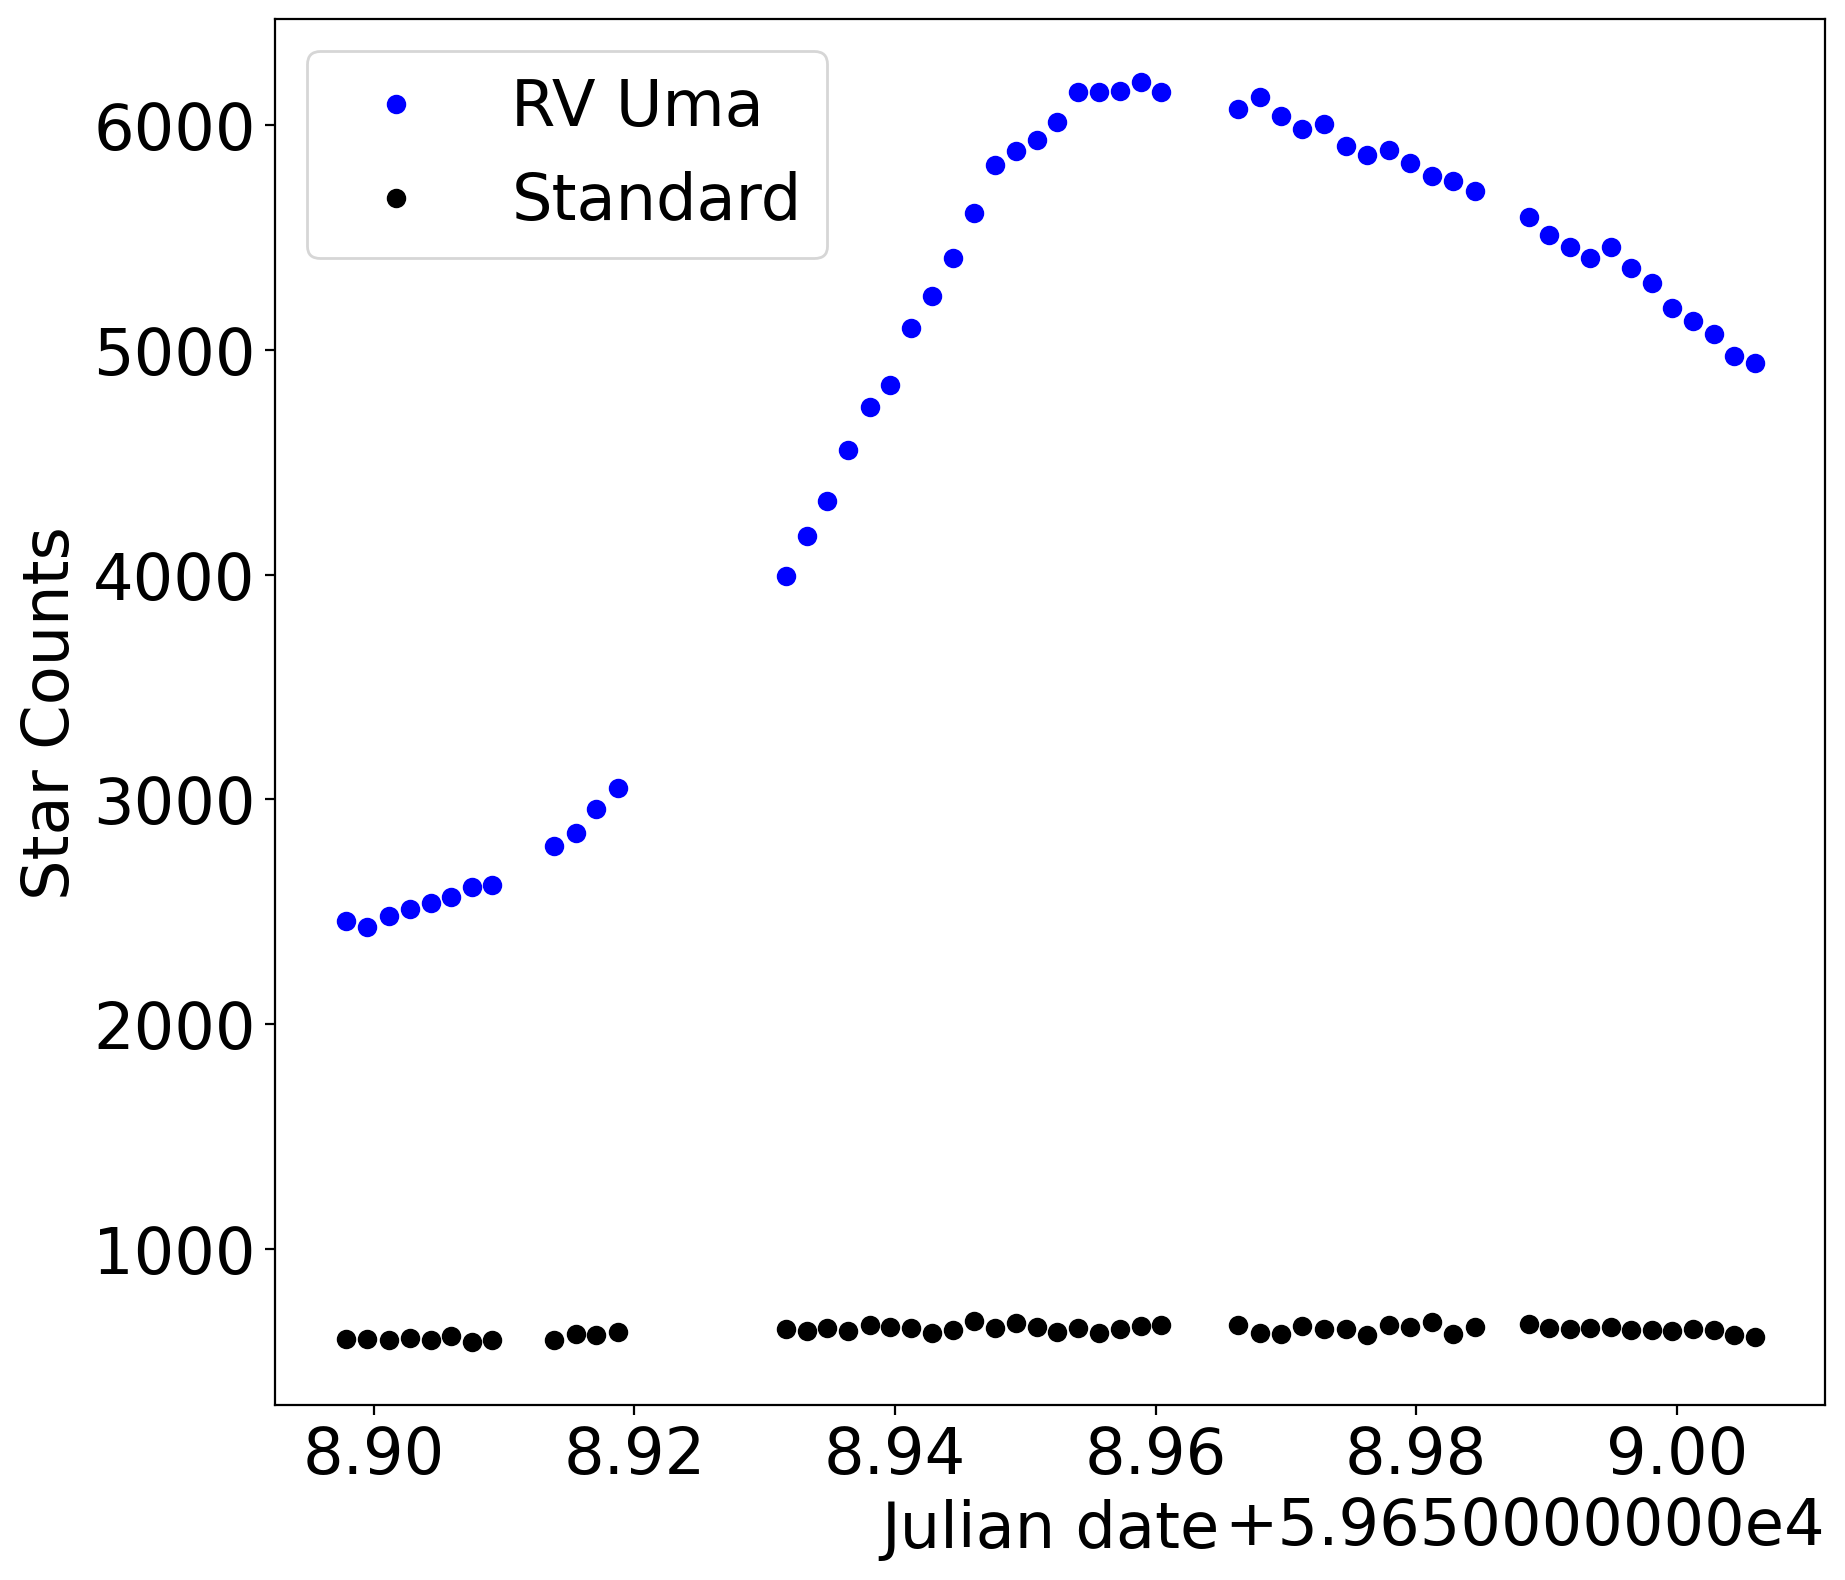

In [14]:
#PLotting star counts against time:
fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(1,1,1)
ax.plot(df_variable['MJD'], df_variable['star counts'], color='blue', marker='o', linestyle='None', label = 'RV Uma')
ax.plot(df_standard['MJD'], df_standard['star counts'], color = 'black', marker='o', linestyle='None', label = 'Standard')
ax.set_xlabel('Julian date', fontsize = 23)
ax.set_ylabel('Star Counts', fontsize = 23)
plt.rcParams.update({'font.size':23})
ax.legend()
plt.show()

In [ ]:
#Calculating insrumental magnitudes:
#https://www.gaia.ac.uk/sites/default/files/resources/Calculating_Magnitudes.pdf 
#http://www.vikdhillon.staff.shef.ac.uk/teaching/phy217/instruments/phy217_inst_photcal.html#:~:text=instrumental%20magnitudes,likely%20to%20be%20in%20counts.
#reference used to find equation (second reference divides by exposure time?)
def uma_mag():
    uma_mag = -1*2.5*np.log(df_variable['uma_counts']/32)
    return uma_mag

def standard_mag():
    standard_mag = -1*2.5*np.log(df_standard['standard_counts']/32)
    return standard_mag

df_variable['uma_mag'] = uma_mag ()
df_standard['standard_mag'] = standard_mag ()

